In [25]:
import pandas as pd#data manipulation
pd.set_option('display.max_columns', None)
import numpy as np # mathematical operations
import scipy as sci # math ops
import seaborn as sns # visualizations
import matplotlib.pyplot as plt # for plottings
%matplotlib inline 
from sklearn.utils import shuffle
from sklearn import metrics

In [5]:
train = pd.read_csv('/content/drive/MyDrive/Datascience/Santander/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Datascience/Santander/test.csv')

In [7]:
print(train.shape)
print(test.shape)

(4459, 4993)
(49342, 4992)


In [8]:
train.head()

ID      target  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  \
0  000d6aaf2  38000000.0        0.0          0        0.0          0   
1  000fbd867    600000.0        0.0          0        0.0          0   
2  0027d6b71  10000000.0        0.0          0        0.0          0   
3  0028cbf45   2000000.0        0.0          0        0.0          0   
4  002a68644  14400000.0        0.0          0        0.0          0   

   2f0771a37  30347e683  d08d1fbe3  6ee66e115  20aa07010  dc5a8f1d8  \
0          0          0          0          0        0.0        0.0   
1          0          0          0          0  2200000.0        0.0   
2          0          0          0          0        0.0        0.0   
3          0          0          0          0        0.0        0.0   
4          0          0          0          0  2000000.0        0.0   

   11d86fa6a  77c9823f2  8d6c2a0b2  4681de4fd  adf119b9a  cff75dd09  \
0        0.0          0          0          0          0        0.0   
1        0.0          0          0          0          0        0.0   
2        0.0          0          0          0          0        0.0   
3        0.0          0          0          0          0        0.0   
4        0.0          0          0          0          0        0.0   

   96f83a237  b8a716ebf  6c7a4567c  4fcfd2b4d  f3b9c0b95  71cebf11c  \
0          0        0.0          0          0        0.0          0   
1          0        0.0          0          0        0.0          0   
2          0        0.0          0          0        0.0          0   
3          0        0.0          0          0        0.0          0   
4          0        0.0          0          0        0.0          0   

   d966ac62c  68b647452  c88d108c9  ff7b471cd  d5308d8bc  0d866c3d7  \
0          0        0.0          0          0          0        0.0   
1          0        0.0          0          0          0        0.0   
2          0        0.0          0          0          0        0.0   
3          0        0.0          0          0          0        0.0   
4          0        0.0          0          0          0        0.0   

   bc3f77679  bd8f989f1  0eff5bf95  22ed6dba3  92b13ebba  c330f1a67  \
0          0        0.0          0        0.0        0.0          0   
1          0        0.0          0        0.0        0.0          0   
2          0        0.0          0        0.0        0.0          0   
3          0        0.0          0        0.0        0.0          0   
4          0        0.0          0        0.0        0.0          0   

   233c7c17c  2cb4d123e  eeac16933  87ffda550  822e49b95  316b978cd  \
0        0.0          0          0  1300000.0        0.0          0   
1        0.0          0          0        0.0        0.0          0   
2        0.0          0          0        0.0        0.0          0   
3        0.0          0          0        0.0        0.0          0   
4        0.0          0          0        0.0        0.0          0   

   d04e16aed  5d5c5ce6d  ec863cb52  11ad148bd  ea18d720e  408d86ce9  \
0        0.0          0          0        0.0        0.0        0.0   
1        0.0          0          0        0.0        0.0        0.0   
2        0.0          0          0        0.0        0.0        0.0   
3        0.0          0          0        0.0        0.0        0.0   
4        0.0          0          0        0.0        0.0        0.0   

   69d8b4020  b0868a049  80b14398e  ecdef52b2  c36bcacc5  151d318cd  \
0          0          0        0.0        0.0          0          0   
1          0          0        0.0        0.0          0          0   
2          0          0        0.0        0.0          0          0   
3          0          0        0.0        0.0          0          0   
4          0          0        0.0        0.0          0          0   

   ab0cddb90  2d6bd8275   dfdf4b580  c87722678  a8c320153  7df8788e8  \
0          0        0.0         0.0          0          0          0   
1          0     

In [9]:
null_columns = []
for i in list(train.columns.values):
    null_columns.append(train[i].isnull().sum())
print(sum(null_columns))

0


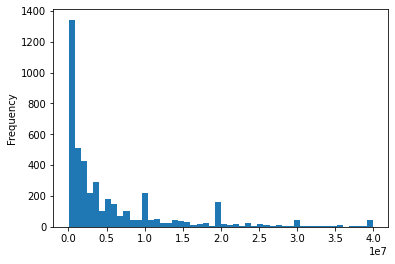

In [10]:
train['target'].plot(kind='hist',bins=50)

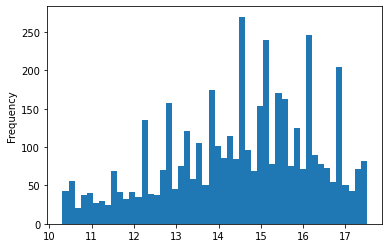

In [11]:
train['target2'] = np.log(train['target'])
train['target2'].plot(kind='hist',bins=50)

In [12]:
X = train.drop(['ID', 'target'], axis = 1)
y = np.log(train['target'])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
def correlation(dataset, threshold):
  col_corr  = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

In [ ]:
corr_features = correlation(X_train, 0.8)
print(corr_features)

In [14]:
X_train =X_train.drop(['9e39c29d0', '3694b34c5', '7d9979702', '3132de0a3', '9535efa4c', 'fc035f0aa', 'b488b6a67', '74f15ad1c', '71b203550', '937854db6', '8ba7eacbb', 'afc08501b', 'bba402827', 'aca228668', 'b9e9ec060', '6c7bf200b', '7e814a30d', 'a06b69c08', '7f16cc7a5', 'd6af4ee1a', '64834659b', 'd9c07e001', '30eca0501', 'a2378b86a', '2b822ae10', '6c7278ead', 'ad4e33a4c', '20442bac4', '4e2abc4ad', '00ebe887d', '7f9d59cb3', 'c0f8422e1', 'af4035fa0', '13bfe432c', '2a7787202', 'b7ce8464e', '62c547c8e', '1d6069c98', '41d1e5f8f', '8e978ee65', '8794c72c8', 'a208e54c7', '68afb64c3', '23d6be31e', '20ff37b40', '84947363e', 'c959d372a', 'c6e8b5b5c', '35dac887f', 'be02583eb', '45b68f38e', 'f8341140d', '69900c0d1', '73eeb092f', '474a9ec54', 'aef2f0a59', '7df9efba5', '5a7e898a1', '22abeffb6', '86f13324d', 'd7568383a', 'a8b721722', '3b911747c', '1b01ba505', 'ee95f6389', 'a3382e205', 'fa9e059a1', '5e6a5bce6', '024480f48', '1cb237c61', 'ab7b12083', '9303c6806', '24292d615', '52f946988', 'e04141e42', '68084ece1', 'eb2a78609', 'cde3e280a', '455b1d1ae', '99b88d0fd', '5d4b3b236', '4877151a3', '30d63d3e4', 'fbc6c2b78', '5ca0b9b0c', 'ce375f93c', '0f49e0f05', '14d1d798e', 'db7c939c5', '323fd38a8', '0b2e88d2d', '23c780950', 'aeef86cf2', '7f91dc936', 'f3522fdaf', '5964f1856', 'a63aaf7cc', 'a6bf610b3', '7385f8997', '115d5bc1a', '354d9a875', 'f40da20f4', 'a25bc2d4a', 'b46191036', '24bcc2f15', 'f950ac768', 'c0f2800fc', 'fc5690e51', '76e092b8c', '493eeb973', '47d17d395', '319e171fb', '77f5250e3', '207871d87', '3f07a4581', 'd9a8918f9', '596104fd4', 'a6f9bb77e', '8d13d891d', 'caa9883f6', '925ce0d9b', 'e81758b8e', '48f9838a4', '8d918c64f', 'a77d3eb03', '3a743de4d', 'a246962f5', '6c9ae21e2', 'a5fb00d9b', '45cda25bb', 'a78f85d49', '782ef399c', 'daf731030', '24d338fd8', '7be4eb1e5', '945dad481', '2a3f07749', 'e32c2263e', 'a8b66bc96', '7acda93e6', '42b147ade', '310e1ede9', 'bf2b3327b', '834f60cb1', 'b79729525', '3fd19b6cd', '8c2e787b0', '6e738ec87', '337b3e53b', 'f14a940a2', '9b053a045', '94ac25570', 'c144a70b1', '8016f08af', '18e3e1563', '007ee91d1', '77deffdf0', 'b200c8b4a', '9e38af23b', '5f11fbe33', '2a728c5fd', '7f91c7cbb', 'f66618ee4', '16c5d9c01', '6f460d92f', 'ac37543df', '12f9c92b6', '718ce36a5', '45293f374', '7a91cb0bc', 'e10730b82', '99ea04b86', '0ab4a0fb9', '7e473a0c9', '0ac076350', 'e7eac13e0', 'eb25d54d4', '982210169', '7a29b3092', 'd51d10e38', '28690ae0d', '571380d69', '4d1f9e4d7', 'e398df91e', '3377a30e2', '69e8244a3', 'f9fad35ac', '464676511', '3be79d4a5', '259169df2', 'a28164ed4', 'd7f1f9e52', '859993c8b', 'a5e0d3ddb', '965fa6747', '398cdc105', 'df2388808', 'c46028c0f', 'f52409b3e', '2c5809e51', '5e3c42446', 'd9d7227a4', '0019109c4', 'acd43607d', 'f31b73813', 'fed0df103', '65cb52d6d', 'fe56ddf0f', 'c83fc48f2', 'e4eac6fc5', '9e17387dc', 'ffec49dae', 'f62b69c09', 'adf9455bf', '1b20c5c27', 'a2d1008bb', '809a511d0', '2bc6017e1', '4b373b8a7', '89cffafe9', '49a10e089', 'a43c53c45', 'd9aa1935e', '8b99e0487', 'f6f15ffa5', '693972ceb', 'f553483a0', '65f701080', '718f26ed2', '3a13ed79a', '19537e282', 'f43c09c81', '03ab9c0ea', '767b6d272', '599096d8a', 'cdca583c8', '8d401b32e', 'fd99222ee', '343922109', '9855c78bb', '3ecc09859', '27859b383', '175891ff4', 'ad17d2065', 'a8ef2a0d2', '912028f4e', 'e1e8947d8', '50108b5b5', '8b596c673', 'f5c5884de', '82953c4cd', 'b47be7e76', '246488579', '0895b9597', '7a34c9e13', '59de861ff', '71ac2b961', 'bb3d53354', '58939b6cc', 'd1383f1c6', 'ce734c365', '52b08fd22', '1d0aaa90f', 'c5512041d', '67f9e982f', 'b86161bff', '46c525541', 'f2c0fa7cf', '1b7ec860b', '6d82c5c16', '912836770', '01b72b3dc', '159eb4fbc', 'a6fc6205f', 'aca96197c', '4cbc12381', '236910072', '256640de9', '00f844fea', '36cde3ce8', 'e9d64c20a', 'c45d71aeb', '1029d9146', '992b5c34d', '039b8bbc6', '56ec098a1', 'da0c7bb85', '2e5424c98', '28a5ad41a', '12a00890f', 'e39963089', '9e89978e3', 'a388d3605', '4480c1096', 'd95cab24f', '7e09648c9', '4b624857b', '127e5767c', '1ae0db9d5', 'df8466d2a', '670a46cd0', 'e0df7616e', '4c938629c', '172a58959', '9d2835f75', '3187cfde0', 'ef10260e3', '06d24b818', 'cef9ab060', '68ad815c8', 'e17a13988', '533e43257', '8c61bede6', '086328cc6', 'b6d60e4d5', 'e5b2d137a', 'cb7ecfc41', '3c9f7809d', 'e86d346f8', 'f8a3bb673', '5894b1b1a', '548c02798', '19f721ba0', 'f81c2f1dd', '7e86f57c0', '83ce5d80d', 'ec88e0a6a', 'ad566b17c', '0dc4d6c7d', '784b9525e', '3f8614071', '96fec9b38', '56b9c3eb3', '22c933b9b', '24218ec6a', 'a380d5301', '9d4f88c7b', '397621ffa', '070f95c99', 'bec7c48dd', '5cab25704', 'bb6f59108', '6045a2949', '40b0f918f', 'fe326ffa1', 'bcc18dd40', 'a240f6da7', 'f990bddac', '137efaa80', '6eebf3ca4', 'c14e46633', 'eb058a6c1', '273fa781d', '0dfd57950', '27c4472c3', '37a382722', 'ed6e7fdaf', '2dbeac1de', 'ee39f2138', '721c60041', '4d6a1439e', '5466764d8', '7c080c111', '3c4df440f', '7acae7ae9', '2f93e3c96', '71b637714', '948e00a8d', '932b61d77', 'eaa0a68c4', '6cd62da62', '506e25985', '37a9ea8c6', '375c6080e', '74bfc4e88', '47c197766', '2c5819699', 'd8ea347e9', 'e9f57e5c6', '8d1a99afd', '35d8689dd', '1bf1406eb', '44dad5d70', 'a1b169a3a', 'f0bdb14ad', '5bf03599f', '4eb8d43ec', '581515692', 'c0d363088', '8405c17e7', 'bf042d928', '58057e2b0', '188a6e279', 'b3abb64d2', 'ed2f00d46', '690c387d6', '83ea288de', 'cdd16fdd1', 'e26149c9e', '9401c82a9', '2e762ec53', '76c1e9617', '2ab9356a0', 'f1a0b77a5', '0aea1fd67', 'fd812d7e0', '089ff7bcb', 'b4d41b335', '025cbf6b1', 'a9099e3b6', 'e0f6a993a', 'f1ac784e3', '942b3234c', '3da6f8d52', '3f382323a', 'c5fa49de1', 'd4cc42c3d', 'cb39211ad', '2a7a88ed3', '3a07a8939', '67ddf8bdd', '2d29edb0a', '275c5ddfa', '70b564f7b', 'd30ff01f8', 'ebccb542e', '2f0c89344', '655fe23b2', '2c339d4f2', '8de6fcbf1', 'c3c3f66ff', '783ee6e9a', 'd30bbe129', 'b794c5b62', '5c0df6ac5', '4e26bc1ff', 'acc5b709d', '01816048b', 'b95a93172', 'ffa45bf70', '35c5fe0ff', 'b0c596a35', 'ce30bda90', 'ef30f6be5', 'e592c0185', 'ff558c2f2', 'be48c4ba8', '26144d11f', 'daa3126d6', '9d2a850a3', '236d276f3', 'c036f4785', '8781e4b91', '0c9b00a91', '7b1ddbabf', 'bc70cbc26', '2fc60d4d9', 'c6d84869a', '67c4a2154', '916d17652', '85f50c67d', 'c10f31664', '295f155e7', 'bc0bb0c26', '692c44993', '1d744ff92', '2e5ccb523', '556fb6bc0', '77bc11659', '50b2ed3a8', '80a9ccc6f', 'b85fa8b27', '9db026fcf', '2e8c5cdc5', 'b6403de0b', '8579b0968', 'b335915da', 'c9aac7536', '83e2ae51c', 'e9375ad86', 'ccc9ba695', 'f86eabcb9', '40f1d0084', '15e4e8ee5', '48aa6d627', '9437d8b64', '4fcb73cb1', '435f27009', 'ff08cfbbe', '7e0fd6d92', '1f26f0f73', 'a403d93e5', '3af1785ee', '98c05b5b4', '18976b9f5', '93521d470', 'd2ef684ed', '802ee804e', '35d9497eb', '971631b2d', '2838d63f7', 'e613715cc', 'a4529b4ef', '0b1560062', 'f4e243e21', 'e36687647', '159e45efa', 'd26b63cf2', '8cdaeadb5', '224a28832', '64819a74c', 'd3ff41260', '86610a923', '64cabb6e7', '29f828a0f', '2a3763e18', '98dea9e42', 'fee2d3bf9', 'da840ba8e', 'bf257a3bc', 'eca6cc5fd', 'a84a800c6', 'feeb05b3f', '249e3ab39', '3dd4cc7a8', '086c13b6c', '9a8252844', '9da65044c', 'f0fa3bfc5', '939cb6e17', '89db78d8e', 'f1f6d2370', '94f26b213', '02dd79dd2', '87380f99d', '8dbd95b8d', '3b583a709', '357a1f6b5', '8ec06d490', '180f8ed6e', 'dd33aef84', 'a7bc83f57', '34a2f580b', 'b65627fab', 'f333a5f60', '2ba3b18ee', '7bf58da23', '13d853d22', '26ab20ff9', '6820130f1', 'ad327fcc0', 'e1ccfad87', '2123a2089', 'd49b0b346', '4fe8b17c2', '4a29bc92b', '348aedc21', '939f628a7', '985f4005a', '42b795e64', '8045561f7', '15e8d7f53', '70f29fefd', '28fbb187a', 'af6ee4862', '6a2ed0e6c', '5995250df', '7b8ac394f', '79e0c374a', '72ad5471c', '8fd2fadca', 'f96fc0e40', 'da52febdb', '2e84e09c5', 'bf35dbb69', '616c01612', '839c9da76', '526a2282d', '22610c726', '7fd35c77a', 'aecbb0f94', '0ebd1ec32', '2cb50edc7', '6e598606d', '2f489369f', 'be90775f4', 'be6c5d3cc', 'e838549ac', 'f34f48706', '23fb9b02c', 'db6ba896a', '56a21fe66', 'e84c67382', 'e1121cd3e', '3871fd3ac', '5a648a09d', 'f97d9431e', '77464b17f', 'f29dfa600', '0b398dcb9', '91389982b', '81ec47b4c', '8d57e2749', '73445227e', 'ed76b9206', '844df03d7', '0f5fb7fe7', '83b151006', '7e4399efc', '440d9ff74', '9450dfed2', 'f471e9e82', 'bb8c64083', '03b6943c4', 'ad94b3f11', '0933930b4', 'd66bbb5ed', 'a7c7af91e', '46e10e042', 'd59047bd3', '856856d94', '4cddcef3e', '07499792b', '44df9c106', '7c482420c', '314396b31', 'b0310a768', '0554bac3e', 'b58127585', 'f642213a6', 'fcc8443d9', 'ae7d89da3', 'd60ddde1b', '8c8616b62', '1d802b493', '569e4df02', '2ef8b7f4f', '294bf4161', 'f7d9dadeb', 'a05794fa5', 'da59aa67e', '94516b63e', 'b4e4a184a', 'eea698cf2', 'f8405f8b9', 'd83a59765', '338651bd1', '9060e5b59', '6e4f74c35', '946d16369', '907e76fa9', 'fac54bd7e', 'ff1551a48', '05f11f48f', '978975efd', '337153b58', '3e7c57d93', '63df94487', 'a09a238d0', 'e3c802dfd', '46b02f955', '5d3b81ef8', '2ad4525cc', 'b6ccc5fcb', '853f29325', '78f45daba', '438d61d86', 'da22ed2b8', '470cea05f', '13ee58af1', '9d6410ef5', '807c7f49d', 'f366072e4', '009990be1', '543010a22', 'fd1620403', '9c1d27a5c', 'c380056bb', '059dcb5a4', 'd279be266', '184166328', 'f6bdb908a', '9c404d218', '903f6fed0', '2155f5e16', '94ecf4c83', '127972c6a', 'a14a16089', '3e3822506', '83b36fa6c', 'b9928ec6a', '6b142730f', '37e85aa12', '13d6a844f', 'fec5eaf1a', '10d7e8a17', 'a31ba11e6', 'cd27ccedf', '5f5aef723', 'dbe757217', '47744f333', 'd204300f2', 'bb37ae1db', '417fdb325', 'ee39e4ce0', '6a1ba30dc', '736fce873', 'f13fa756f', 'b6946d764', '3d3d91a1e', '0eabfcbc0', '6cf2d8705', 'bbd7e6282', '85ef8a837', 'a320c9747', 'ea4046b8d', '925f0ae9c', '36dbda4f6', 'f3901acd1', '2cc07f5bb', 'a5c62af4a', '346c04a64', '7106396d7', 'c63b4a070', 'defcc2c50', 'd08c4204c', 'cb9333bd7', '2eaf9a838', '09a65c3a5', 'a0d77f495', 'b91632873', '2e55d0383', 'bee71cf84', 'fb32c00dc', '268040457', '6240a7bd9', 'be8a71172', 'c2d94313f', '8990c918e', '9dc52515a', 'bf10af17e'], axis =1)

In [19]:
X_test =X_test.drop(['9e39c29d0', '3694b34c5', '7d9979702', '3132de0a3', '9535efa4c', 'fc035f0aa', 'b488b6a67', '74f15ad1c', '71b203550', '937854db6', '8ba7eacbb', 'afc08501b', 'bba402827', 'aca228668', 'b9e9ec060', '6c7bf200b', '7e814a30d', 'a06b69c08', '7f16cc7a5', 'd6af4ee1a', '64834659b', 'd9c07e001', '30eca0501', 'a2378b86a', '2b822ae10', '6c7278ead', 'ad4e33a4c', '20442bac4', '4e2abc4ad', '00ebe887d', '7f9d59cb3', 'c0f8422e1', 'af4035fa0', '13bfe432c', '2a7787202', 'b7ce8464e', '62c547c8e', '1d6069c98', '41d1e5f8f', '8e978ee65', '8794c72c8', 'a208e54c7', '68afb64c3', '23d6be31e', '20ff37b40', '84947363e', 'c959d372a', 'c6e8b5b5c', '35dac887f', 'be02583eb', '45b68f38e', 'f8341140d', '69900c0d1', '73eeb092f', '474a9ec54', 'aef2f0a59', '7df9efba5', '5a7e898a1', '22abeffb6', '86f13324d', 'd7568383a', 'a8b721722', '3b911747c', '1b01ba505', 'ee95f6389', 'a3382e205', 'fa9e059a1', '5e6a5bce6', '024480f48', '1cb237c61', 'ab7b12083', '9303c6806', '24292d615', '52f946988', 'e04141e42', '68084ece1', 'eb2a78609', 'cde3e280a', '455b1d1ae', '99b88d0fd', '5d4b3b236', '4877151a3', '30d63d3e4', 'fbc6c2b78', '5ca0b9b0c', 'ce375f93c', '0f49e0f05', '14d1d798e', 'db7c939c5', '323fd38a8', '0b2e88d2d', '23c780950', 'aeef86cf2', '7f91dc936', 'f3522fdaf', '5964f1856', 'a63aaf7cc', 'a6bf610b3', '7385f8997', '115d5bc1a', '354d9a875', 'f40da20f4', 'a25bc2d4a', 'b46191036', '24bcc2f15', 'f950ac768', 'c0f2800fc', 'fc5690e51', '76e092b8c', '493eeb973', '47d17d395', '319e171fb', '77f5250e3', '207871d87', '3f07a4581', 'd9a8918f9', '596104fd4', 'a6f9bb77e', '8d13d891d', 'caa9883f6', '925ce0d9b', 'e81758b8e', '48f9838a4', '8d918c64f', 'a77d3eb03', '3a743de4d', 'a246962f5', '6c9ae21e2', 'a5fb00d9b', '45cda25bb', 'a78f85d49', '782ef399c', 'daf731030', '24d338fd8', '7be4eb1e5', '945dad481', '2a3f07749', 'e32c2263e', 'a8b66bc96', '7acda93e6', '42b147ade', '310e1ede9', 'bf2b3327b', '834f60cb1', 'b79729525', '3fd19b6cd', '8c2e787b0', '6e738ec87', '337b3e53b', 'f14a940a2', '9b053a045', '94ac25570', 'c144a70b1', '8016f08af', '18e3e1563', '007ee91d1', '77deffdf0', 'b200c8b4a', '9e38af23b', '5f11fbe33', '2a728c5fd', '7f91c7cbb', 'f66618ee4', '16c5d9c01', '6f460d92f', 'ac37543df', '12f9c92b6', '718ce36a5', '45293f374', '7a91cb0bc', 'e10730b82', '99ea04b86', '0ab4a0fb9', '7e473a0c9', '0ac076350', 'e7eac13e0', 'eb25d54d4', '982210169', '7a29b3092', 'd51d10e38', '28690ae0d', '571380d69', '4d1f9e4d7', 'e398df91e', '3377a30e2', '69e8244a3', 'f9fad35ac', '464676511', '3be79d4a5', '259169df2', 'a28164ed4', 'd7f1f9e52', '859993c8b', 'a5e0d3ddb', '965fa6747', '398cdc105', 'df2388808', 'c46028c0f', 'f52409b3e', '2c5809e51', '5e3c42446', 'd9d7227a4', '0019109c4', 'acd43607d', 'f31b73813', 'fed0df103', '65cb52d6d', 'fe56ddf0f', 'c83fc48f2', 'e4eac6fc5', '9e17387dc', 'ffec49dae', 'f62b69c09', 'adf9455bf', '1b20c5c27', 'a2d1008bb', '809a511d0', '2bc6017e1', '4b373b8a7', '89cffafe9', '49a10e089', 'a43c53c45', 'd9aa1935e', '8b99e0487', 'f6f15ffa5', '693972ceb', 'f553483a0', '65f701080', '718f26ed2', '3a13ed79a', '19537e282', 'f43c09c81', '03ab9c0ea', '767b6d272', '599096d8a', 'cdca583c8', '8d401b32e', 'fd99222ee', '343922109', '9855c78bb', '3ecc09859', '27859b383', '175891ff4', 'ad17d2065', 'a8ef2a0d2', '912028f4e', 'e1e8947d8', '50108b5b5', '8b596c673', 'f5c5884de', '82953c4cd', 'b47be7e76', '246488579', '0895b9597', '7a34c9e13', '59de861ff', '71ac2b961', 'bb3d53354', '58939b6cc', 'd1383f1c6', 'ce734c365', '52b08fd22', '1d0aaa90f', 'c5512041d', '67f9e982f', 'b86161bff', '46c525541', 'f2c0fa7cf', '1b7ec860b', '6d82c5c16', '912836770', '01b72b3dc', '159eb4fbc', 'a6fc6205f', 'aca96197c', '4cbc12381', '236910072', '256640de9', '00f844fea', '36cde3ce8', 'e9d64c20a', 'c45d71aeb', '1029d9146', '992b5c34d', '039b8bbc6', '56ec098a1', 'da0c7bb85', '2e5424c98', '28a5ad41a', '12a00890f', 'e39963089', '9e89978e3', 'a388d3605', '4480c1096', 'd95cab24f', '7e09648c9', '4b624857b', '127e5767c', '1ae0db9d5', 'df8466d2a', '670a46cd0', 'e0df7616e', '4c938629c', '172a58959', '9d2835f75', '3187cfde0', 'ef10260e3', '06d24b818', 'cef9ab060', '68ad815c8', 'e17a13988', '533e43257', '8c61bede6', '086328cc6', 'b6d60e4d5', 'e5b2d137a', 'cb7ecfc41', '3c9f7809d', 'e86d346f8', 'f8a3bb673', '5894b1b1a', '548c02798', '19f721ba0', 'f81c2f1dd', '7e86f57c0', '83ce5d80d', 'ec88e0a6a', 'ad566b17c', '0dc4d6c7d', '784b9525e', '3f8614071', '96fec9b38', '56b9c3eb3', '22c933b9b', '24218ec6a', 'a380d5301', '9d4f88c7b', '397621ffa', '070f95c99', 'bec7c48dd', '5cab25704', 'bb6f59108', '6045a2949', '40b0f918f', 'fe326ffa1', 'bcc18dd40', 'a240f6da7', 'f990bddac', '137efaa80', '6eebf3ca4', 'c14e46633', 'eb058a6c1', '273fa781d', '0dfd57950', '27c4472c3', '37a382722', 'ed6e7fdaf', '2dbeac1de', 'ee39f2138', '721c60041', '4d6a1439e', '5466764d8', '7c080c111', '3c4df440f', '7acae7ae9', '2f93e3c96', '71b637714', '948e00a8d', '932b61d77', 'eaa0a68c4', '6cd62da62', '506e25985', '37a9ea8c6', '375c6080e', '74bfc4e88', '47c197766', '2c5819699', 'd8ea347e9', 'e9f57e5c6', '8d1a99afd', '35d8689dd', '1bf1406eb', '44dad5d70', 'a1b169a3a', 'f0bdb14ad', '5bf03599f', '4eb8d43ec', '581515692', 'c0d363088', '8405c17e7', 'bf042d928', '58057e2b0', '188a6e279', 'b3abb64d2', 'ed2f00d46', '690c387d6', '83ea288de', 'cdd16fdd1', 'e26149c9e', '9401c82a9', '2e762ec53', '76c1e9617', '2ab9356a0', 'f1a0b77a5', '0aea1fd67', 'fd812d7e0', '089ff7bcb', 'b4d41b335', '025cbf6b1', 'a9099e3b6', 'e0f6a993a', 'f1ac784e3', '942b3234c', '3da6f8d52', '3f382323a', 'c5fa49de1', 'd4cc42c3d', 'cb39211ad', '2a7a88ed3', '3a07a8939', '67ddf8bdd', '2d29edb0a', '275c5ddfa', '70b564f7b', 'd30ff01f8', 'ebccb542e', '2f0c89344', '655fe23b2', '2c339d4f2', '8de6fcbf1', 'c3c3f66ff', '783ee6e9a', 'd30bbe129', 'b794c5b62', '5c0df6ac5', '4e26bc1ff', 'acc5b709d', '01816048b', 'b95a93172', 'ffa45bf70', '35c5fe0ff', 'b0c596a35', 'ce30bda90', 'ef30f6be5', 'e592c0185', 'ff558c2f2', 'be48c4ba8', '26144d11f', 'daa3126d6', '9d2a850a3', '236d276f3', 'c036f4785', '8781e4b91', '0c9b00a91', '7b1ddbabf', 'bc70cbc26', '2fc60d4d9', 'c6d84869a', '67c4a2154', '916d17652', '85f50c67d', 'c10f31664', '295f155e7', 'bc0bb0c26', '692c44993', '1d744ff92', '2e5ccb523', '556fb6bc0', '77bc11659', '50b2ed3a8', '80a9ccc6f', 'b85fa8b27', '9db026fcf', '2e8c5cdc5', 'b6403de0b', '8579b0968', 'b335915da', 'c9aac7536', '83e2ae51c', 'e9375ad86', 'ccc9ba695', 'f86eabcb9', '40f1d0084', '15e4e8ee5', '48aa6d627', '9437d8b64', '4fcb73cb1', '435f27009', 'ff08cfbbe', '7e0fd6d92', '1f26f0f73', 'a403d93e5', '3af1785ee', '98c05b5b4', '18976b9f5', '93521d470', 'd2ef684ed', '802ee804e', '35d9497eb', '971631b2d', '2838d63f7', 'e613715cc', 'a4529b4ef', '0b1560062', 'f4e243e21', 'e36687647', '159e45efa', 'd26b63cf2', '8cdaeadb5', '224a28832', '64819a74c', 'd3ff41260', '86610a923', '64cabb6e7', '29f828a0f', '2a3763e18', '98dea9e42', 'fee2d3bf9', 'da840ba8e', 'bf257a3bc', 'eca6cc5fd', 'a84a800c6', 'feeb05b3f', '249e3ab39', '3dd4cc7a8', '086c13b6c', '9a8252844', '9da65044c', 'f0fa3bfc5', '939cb6e17', '89db78d8e', 'f1f6d2370', '94f26b213', '02dd79dd2', '87380f99d', '8dbd95b8d', '3b583a709', '357a1f6b5', '8ec06d490', '180f8ed6e', 'dd33aef84', 'a7bc83f57', '34a2f580b', 'b65627fab', 'f333a5f60', '2ba3b18ee', '7bf58da23', '13d853d22', '26ab20ff9', '6820130f1', 'ad327fcc0', 'e1ccfad87', '2123a2089', 'd49b0b346', '4fe8b17c2', '4a29bc92b', '348aedc21', '939f628a7', '985f4005a', '42b795e64', '8045561f7', '15e8d7f53', '70f29fefd', '28fbb187a', 'af6ee4862', '6a2ed0e6c', '5995250df', '7b8ac394f', '79e0c374a', '72ad5471c', '8fd2fadca', 'f96fc0e40', 'da52febdb', '2e84e09c5', 'bf35dbb69', '616c01612', '839c9da76', '526a2282d', '22610c726', '7fd35c77a', 'aecbb0f94', '0ebd1ec32', '2cb50edc7', '6e598606d', '2f489369f', 'be90775f4', 'be6c5d3cc', 'e838549ac', 'f34f48706', '23fb9b02c', 'db6ba896a', '56a21fe66', 'e84c67382', 'e1121cd3e', '3871fd3ac', '5a648a09d', 'f97d9431e', '77464b17f', 'f29dfa600', '0b398dcb9', '91389982b', '81ec47b4c', '8d57e2749', '73445227e', 'ed76b9206', '844df03d7', '0f5fb7fe7', '83b151006', '7e4399efc', '440d9ff74', '9450dfed2', 'f471e9e82', 'bb8c64083', '03b6943c4', 'ad94b3f11', '0933930b4', 'd66bbb5ed', 'a7c7af91e', '46e10e042', 'd59047bd3', '856856d94', '4cddcef3e', '07499792b', '44df9c106', '7c482420c', '314396b31', 'b0310a768', '0554bac3e', 'b58127585', 'f642213a6', 'fcc8443d9', 'ae7d89da3', 'd60ddde1b', '8c8616b62', '1d802b493', '569e4df02', '2ef8b7f4f', '294bf4161', 'f7d9dadeb', 'a05794fa5', 'da59aa67e', '94516b63e', 'b4e4a184a', 'eea698cf2', 'f8405f8b9', 'd83a59765', '338651bd1', '9060e5b59', '6e4f74c35', '946d16369', '907e76fa9', 'fac54bd7e', 'ff1551a48', '05f11f48f', '978975efd', '337153b58', '3e7c57d93', '63df94487', 'a09a238d0', 'e3c802dfd', '46b02f955', '5d3b81ef8', '2ad4525cc', 'b6ccc5fcb', '853f29325', '78f45daba', '438d61d86', 'da22ed2b8', '470cea05f', '13ee58af1', '9d6410ef5', '807c7f49d', 'f366072e4', '009990be1', '543010a22', 'fd1620403', '9c1d27a5c', 'c380056bb', '059dcb5a4', 'd279be266', '184166328', 'f6bdb908a', '9c404d218', '903f6fed0', '2155f5e16', '94ecf4c83', '127972c6a', 'a14a16089', '3e3822506', '83b36fa6c', 'b9928ec6a', '6b142730f', '37e85aa12', '13d6a844f', 'fec5eaf1a', '10d7e8a17', 'a31ba11e6', 'cd27ccedf', '5f5aef723', 'dbe757217', '47744f333', 'd204300f2', 'bb37ae1db', '417fdb325', 'ee39e4ce0', '6a1ba30dc', '736fce873', 'f13fa756f', 'b6946d764', '3d3d91a1e', '0eabfcbc0', '6cf2d8705', 'bbd7e6282', '85ef8a837', 'a320c9747', 'ea4046b8d', '925f0ae9c', '36dbda4f6', 'f3901acd1', '2cc07f5bb', 'a5c62af4a', '346c04a64', '7106396d7', 'c63b4a070', 'defcc2c50', 'd08c4204c', 'cb9333bd7', '2eaf9a838', '09a65c3a5', 'a0d77f495', 'b91632873', '2e55d0383', 'bee71cf84', 'fb32c00dc', '268040457', '6240a7bd9', 'be8a71172', 'c2d94313f', '8990c918e', '9dc52515a', 'bf10af17e'], axis =1)

In [20]:
X_test.shape

(1338, 4251)

In [21]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [23]:
LR.score(X_train,y_train)

0.9999999999999994

In [24]:
LR.score(X_test,y_test)

0.9983725659745448

In [26]:
from sklearn.metrics import r2_score
re = r2_score(y_test, y_pred)
print("R square error",re)


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square error 0.9983725659745448
MAE: 0.028281338640819484
MSE: 0.004995767245380188
RMSE: 0.0706807416866871


In [27]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, y_train)

[15:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [30]:

pred = abs(XGB.predict(X_test))

In [31]:
from sklearn.metrics import r2_score
re = r2_score(y_test, pred)
print("R square error",re)


print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R square error 0.999912560514681
MAE: 0.010415662787327185
MSE: 0.0002684147620590081
RMSE: 0.016383368458867308
